# Tech challenge for Cobify
<p align="center">
  <a href="" rel="noopener">
 <img width=400px height=150px src="https://camo.githubusercontent.com/a70f459b10d2ba6cdc24f887af992e6b522797b3f631dcfd21ac64d80bedaf88/68747470733a2f2f6b616d6973657461732e636f6d2f696d6167652f626f726461646f732f436f62692d42617263656c6f6e612d39322d7061726368652e676966" alt="Project logo"></a>
</p>

---

### Challenge📈

    1. Find the best combustible

### Proceso📝

    1. ETL
    2. EDA
    3. Visualization
    4. Predictions
    5. Storytelling
     

### Our data set source [Kaggle](https://www.kaggle.com/datasets/anderas/car-consume) 💻

**Content:** In the file, you will find the displayed distance (km); the consume (L/100km); the average speed (km/h), the temperature i had inside (°C), the temperature outside (°C), anything special that happened, if it was raining, if the air condition was on, if it was sunny enough that the car felt warm when i started it… and yes - the gas type i was using. I have also two columns saying how much and which gas type I was buying. Careful with those. The numbers don't add exactly up, because I note only the rides that occur under certain conditions: If the car was not cooling down enough to have another independent measure from the one before, i don't note it.

I started writing down the data in November, changed to SP98 in winter, and back to E10 in spring. Apart from that, the data is rather clean as i was doing my own project on it already.

## Imports Libraries and ETL

In [1]:
#working data
import pandas as pd
import numpy as np
import datetime

#remove warnings
import warnings
warnings.filterwarnings('ignore')

#show all columns of df.head
pd.set_option('display.max_columns', None)

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('Solarize_Light2')

%matplotlib inline

In [2]:
df= pd.read_csv(r'C:\Users\Oriana Ampuero\ironhack\PRUEBATÉCNICA\technical_challenge_DA\data\measurements.csv')
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


## EDA

In [3]:
#General info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [4]:
#df dimensions

print(f'ROWS: {df.shape[0]}') 
print(f'COLUMNS: {df.shape[1]}')

ROWS: 388
COLUMNS: 12


In [5]:
#additional data

df.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [11]:
#columns names

df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [12]:
#rename columns

df= df.rename(columns={'AC': 'ac', 'refill liters': 'refill_liters', 'refill gas': 'refill_gas'})

In [13]:
#null values

df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

In [15]:
#drop columns because they are almost all null and void and do not add value. 

drop_c= df[['specials', 'refill_liters', 'refill_gas']]
df= df.drop(columns=drop_c)
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0


In [17]:
#replace commas by dots

replace_commas= ['distance', 'consume', 'temp_inside', 'temp_outside']

for col in replace_commas:
     df[col]= df[col].replace(',', '.')

df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28,5,26,21.5,12,E10,0,0,0
1,12,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [18]:
#correct data type

df[['distance','consume','temp_inside']]= df[['distance','consume','temp_inside']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   ac            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [19]:
#unique values of the categorical column

df.gas_type.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [20]:
# replace the null values by the mean as there are few of them

df.fillna(round(df.mean(), 1), inplace=True)
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


   **Conclusion: there is 1 categorical column 'gas_type', where there are only 2 unique values 'E10', 'SP98' 
    and 8 numerical values 'distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'ac', 'rain', 'sun'.**

## Visualization

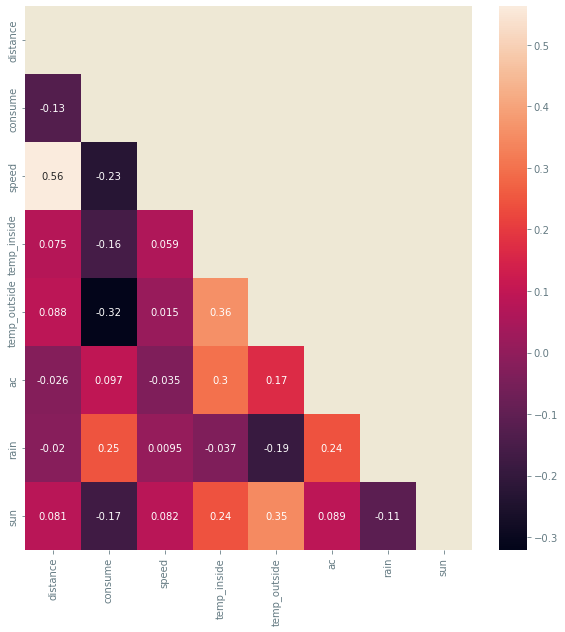

In [38]:
# Calculate correlation matrix and create heatmap

df.corr()
mask= np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True 
fig, ax= plt.subplots(figsize=(10, 10))
ax= sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show();

In [41]:
#numerical df

num_columns= df.select_dtypes(include=np.number)
num_columns.head()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0


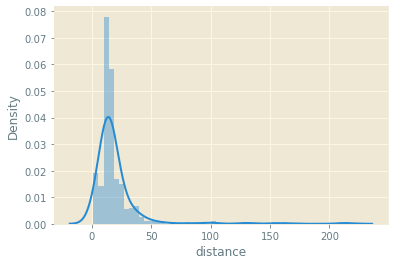

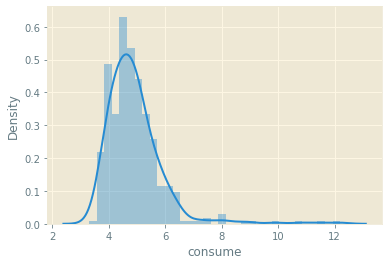

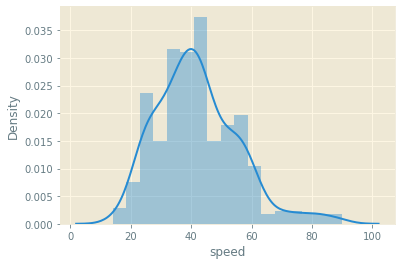

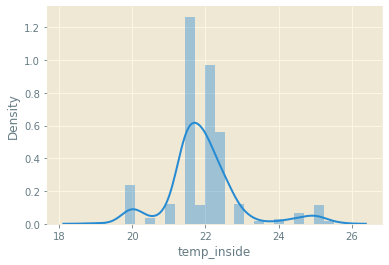

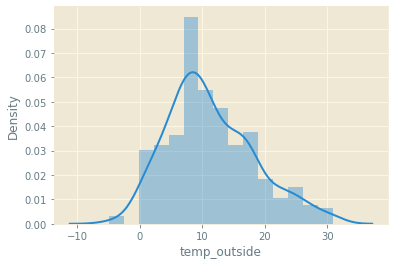

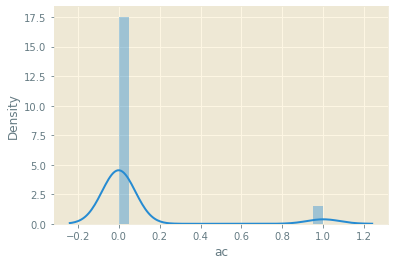

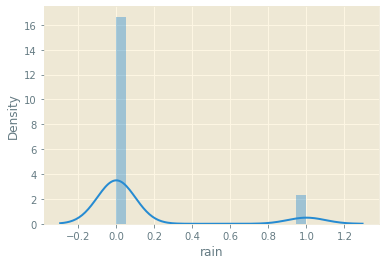

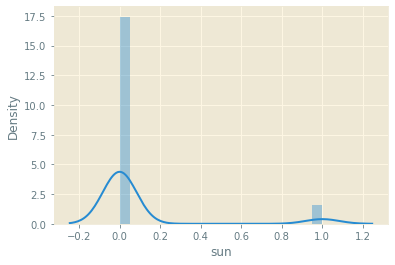

In [43]:
#Exploring numerical data

for column in num_columns.columns:
    sns.distplot(num_columns[column])
    plt.show();

## Storytelling